In [1]:
import pandas as pd
import numpy as np
from linearmodels import PanelOLS
from linearmodels.panel.results import PanelEffectsResults, Summary
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("/Users/kashafali/Documents/Duke/Spring23/UDS/IDS701_final_data.csv")

/var/folders/2s/c87gg64118ndg_yrky9zvlnc0000gn/T/ipykernel_3137/2264768539.py:1: DtypeWarning: Columns (8,28,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/kashafali/Documents/Duke/Spring23/UDS/IDS701_final_data.csv")


In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ENTITY_CD,YEAR,Subject_x,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,NOT_TESTED,NUM_TESTED,...,MEAN_SCORE_non_white,Subject,NUM_TESTED_english_language_learners,NUM_PROF_english_language_learners,TOTAL_SCALE_SCORES_english_language_learners,MEAN_SCORE_english_language_learners,NUM_TESTED_non-english_language_learners,NUM_PROF_non-english_language_learners,TOTAL_SCALE_SCORES_non-english_language_learners,MEAN_SCORE_non-english_language_learners
0,0,0,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
1,1,0,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
2,2,0,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
3,3,0,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
4,4,0,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0


In [4]:
# fix index
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [5]:
df.head()

,ENTITY_CD,YEAR,Subject_x,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,NOT_TESTED,NUM_TESTED,NUM_PROF,PER_PROF,...,MEAN_SCORE_non_white,Subject,NUM_TESTED_english_language_learners,NUM_PROF_english_language_learners,TOTAL_SCALE_SCORES_english_language_learners,MEAN_SCORE_english_language_learners,NUM_TESTED_non-english_language_learners,NUM_PROF_non-english_language_learners,TOTAL_SCALE_SCORES_non-english_language_learners,MEAN_SCORE_non-english_language_learners
0,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
1,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
2,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
3,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0
4,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,602.6,ELA,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0


In [6]:
df.columns

Index(['ENTITY_CD', 'YEAR', 'Subject_x', 'ASSESSMENT_NAME', 'ENTITY_NAME',
       'SUBGROUP_NAME', 'NOT_TESTED', 'NUM_TESTED', 'NUM_PROF', 'PER_PROF',
       'TOTAL_SCALE_SCORES', 'MEAN_SCORE', 'TOTAL_COUNT', 'PCT_NOT_TESTED',
       'PCT_TESTED', 'ES_ELA', 'ES_MATH', 'ES_SCI', 'ES', 'MS_ELA', 'MS_MATH',
       'MS_SCI', 'MS', 'EM', 'ST_NOTSURE', 'Female_MEAN_SCORE',
       'Female_NOT_TESTED', 'Female_NUM_PROF', 'Female_NUM_TESTED',
       'Female_PER_PROF', 'Female_TOTAL_SCALE_SCORES', 'Male_MEAN_SCORE',
       'Male_NOT_TESTED', 'Male_NUM_PROF', 'Male_NUM_TESTED', 'Male_PER_PROF',
       'Male_TOTAL_SCALE_SCORES', 'Female_PCT_NOT_TESTED', 'Female_PCT_TESTED',
       'Female_TOTAL_COUNT', 'Male_PCT_NOT_TESTED', 'Male_PCT_TESTED',
       'Male_TOTAL_COUNT', 'Subject_y', 'NUM_TESTED_white', 'NUM_PROF_white',
       'TOTAL_SCALE_SCORES_white', 'MEAN_SCORE_white', 'NUM_TESTED_non_white',
       'NUM_PROF_non_white', 'TOTAL_SCALE_SCORES_non_white',
       'MEAN_SCORE_non_white', 'Subject'

In [7]:
columns = ['ENTITY_CD', 'YEAR', 'ASSESSMENT_NAME', 'ENTITY_NAME',
       'SUBGROUP_NAME', 'MEAN_SCORE', 'ES', 'MS', 'EM', 'ST_NOTSURE', 
       'Male_MEAN_SCORE', 'Female_MEAN_SCORE',
       'MEAN_SCORE_white', 'MEAN_SCORE_non_white', 'Subject',
       'MEAN_SCORE_english_language_learners',
       'MEAN_SCORE_non-english_language_learners']

In [8]:
df_final = df[columns]

In [9]:
df_final.head()

,ENTITY_CD,YEAR,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,MEAN_SCORE,ES,MS,EM,ST_NOTSURE,Male_MEAN_SCORE,Female_MEAN_SCORE,MEAN_SCORE_white,MEAN_SCORE_non_white,Subject,MEAN_SCORE_english_language_learners,MEAN_SCORE_non-english_language_learners
0,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,604.0,610.0,602.6,ELA,580.0,604.0
1,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,604.0,610.0,602.6,ELA,580.0,604.0
2,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,604.0,610.0,602.6,ELA,580.0,604.0
3,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,604.0,610.0,602.6,ELA,580.0,604.0
4,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,604.0,610.0,602.6,ELA,580.0,604.0


In [10]:
df_final.columns

Index(['ENTITY_CD', 'YEAR', 'ASSESSMENT_NAME', 'ENTITY_NAME', 'SUBGROUP_NAME',
       'MEAN_SCORE', 'ES', 'MS', 'EM', 'ST_NOTSURE', 'Male_MEAN_SCORE',
       'Female_MEAN_SCORE', 'MEAN_SCORE_white', 'MEAN_SCORE_non_white',
       'Subject', 'MEAN_SCORE_english_language_learners',
       'MEAN_SCORE_non-english_language_learners'],
      dtype='object')

In [11]:
columns_f = ['ENTITY_CD', 'YEAR', 'ASSESSMENT_NAME', 'ENTITY_NAME', 'SUBGROUP_NAME',
       'MEAN_SCORE', 'ES', 'MS', 'EM', 'ST_NOTSURE', 
       'Female_MEAN_SCORE', 'MEAN_SCORE_white', 'MEAN_SCORE_non_white',
       'Subject', 'MEAN_SCORE_english_language_learners',
       'MEAN_SCORE_non-english_language_learners']

df_f = df_final[columns_f]

In [12]:
# add new column Gender which is 1

df_f["Female"] = 1

# rename Female_MEAN_SCORE as Gender_MEAN_SCORE

df_f = df_f.rename(columns={'Female_MEAN_SCORE': 'Gender_MEAN_SCORE'})

df_f.head()

,ENTITY_CD,YEAR,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,MEAN_SCORE,ES,MS,EM,ST_NOTSURE,Gender_MEAN_SCORE,MEAN_SCORE_white,MEAN_SCORE_non_white,Subject,MEAN_SCORE_english_language_learners,MEAN_SCORE_non-english_language_learners,Female
0,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
1,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
2,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
3,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
4,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1


In [13]:
columns_m = ['ENTITY_CD', 'YEAR', 'ASSESSMENT_NAME', 'ENTITY_NAME', 'SUBGROUP_NAME',
       'MEAN_SCORE', 'ES', 'MS', 'EM', 'ST_NOTSURE', 
       'Male_MEAN_SCORE', 'MEAN_SCORE_white', 'MEAN_SCORE_non_white',
       'Subject', 'MEAN_SCORE_english_language_learners',
       'MEAN_SCORE_non-english_language_learners']

df_m = df_final[columns_m]

In [14]:
# add new column Gender which is 1

df_m["Female"] = 0

# rename Female_MEAN_SCORE as Gender_MEAN_SCORE

df_m = df_m.rename(columns={'Male_MEAN_SCORE': 'Gender_MEAN_SCORE'})

df_m.head()

,ENTITY_CD,YEAR,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,MEAN_SCORE,ES,MS,EM,ST_NOTSURE,Gender_MEAN_SCORE,MEAN_SCORE_white,MEAN_SCORE_non_white,Subject,MEAN_SCORE_english_language_learners,MEAN_SCORE_non-english_language_learners,Female
0,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,610.0,602.6,ELA,580.0,604.0,0
1,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,610.0,602.6,ELA,580.0,604.0,0
2,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,610.0,602.6,ELA,580.0,604.0,0
3,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,610.0,602.6,ELA,580.0,604.0,0
4,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,598.0,610.0,602.6,ELA,580.0,604.0,0


In [15]:
# concat

final_df = pd.concat([df_f, df_m])


In [16]:
final_df.head()

,ENTITY_CD,YEAR,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,MEAN_SCORE,ES,MS,EM,ST_NOTSURE,Gender_MEAN_SCORE,MEAN_SCORE_white,MEAN_SCORE_non_white,Subject,MEAN_SCORE_english_language_learners,MEAN_SCORE_non-english_language_learners,Female
0,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
1,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
2,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
3,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1
4,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1


In [17]:
# create new column for covid_year

# final_df["covid_year"] = 0 where year is 2018 or 2019

final_df['post_covid'] = np.where((final_df['YEAR'] == 2018) | (final_df['YEAR'] == 2019), 0, 1)


In [18]:
final_df.head()

,ENTITY_CD,YEAR,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,MEAN_SCORE,ES,MS,EM,ST_NOTSURE,Gender_MEAN_SCORE,MEAN_SCORE_white,MEAN_SCORE_non_white,Subject,MEAN_SCORE_english_language_learners,MEAN_SCORE_non-english_language_learners,Female,post_covid
0,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0
1,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0
2,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0
3,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0
4,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0


In [19]:
# create race gap variable which is 1 if the mean exam score for white is higher than the mean exam score for non-white, and 0 otherwise.

final_df["race_gap"] = np.where(final_df["MEAN_SCORE_white"] > final_df["MEAN_SCORE_non_white"], 1, 0)

# create ell gap variable which is 1 if the mean exam score for ELL is higher than the mean exam score for non-ELL, and 0 otherwise.

final_df["ell_gap"] = np.where(final_df["MEAN_SCORE_english_language_learners"] > final_df["MEAN_SCORE_non-english_language_learners"], 1, 0)



In [20]:
final_df.head()

,ENTITY_CD,YEAR,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,MEAN_SCORE,ES,MS,EM,ST_NOTSURE,Gender_MEAN_SCORE,MEAN_SCORE_white,MEAN_SCORE_non_white,Subject,MEAN_SCORE_english_language_learners,MEAN_SCORE_non-english_language_learners,Female,post_covid,race_gap,ell_gap
0,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0,1,0
1,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0,1,0
2,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0,1,0
3,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0,1,0
4,1,2018,ELA5,NYC Public Schools,All Students,601.0,1,1,1,0.0,604.0,610.0,602.6,ELA,580.0,604.0,1,0,1,0


In [21]:
# remove row where assessment_name is RegentsScience8

final_df = final_df[final_df.ASSESSMENT_NAME != 'RegentsScience8']

In [22]:
final_df_w_multiindex = final_df.set_index(["ENTITY_CD", "YEAR"])

In [26]:
mod = PanelOLS.from_formula(
    "Gender_MEAN_SCORE ~ 1 + Female + post_covid + Female:post_covid + ASSESSMENT_NAME + race_gap + ell_gap + EntityEffects + TimeEffects",
    data=final_df_w_multiindex, drop_absorbed=True
)
results = mod.fit(cov_type="clustered", cluster_entity=True)

/var/folders/2s/c87gg64118ndg_yrky9zvlnc0000gn/T/ipykernel_3137/1743008582.py:5: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

post_covid

  results = mod.fit(cov_type="clustered", cluster_entity=True)


In [27]:
results

Dep. Variable:,Gender_MEAN_SCORE,R-squared:,0.9997
Estimator:,PanelOLS,R-squared (Between):,0.5436
No. Observations:,18531332,R-squared (Within):,0.9997
Date:,"Tue, May 02 2023",R-squared (Overall):,0.9989
Time:,06:11:58,Log-likelihood,-4.819e+07
Cov. Estimator:,Clustered,,
,,F-statistic:,3.453e+09
Entities:,15,P-value,0.0000
Avg Obs:,1.235e+06,Distribution:,"F(17,18531297)"
Min Obs:,7.908e+05,,
Max Obs:,1.414e+06,F-statistic (robust):,2.123e+19


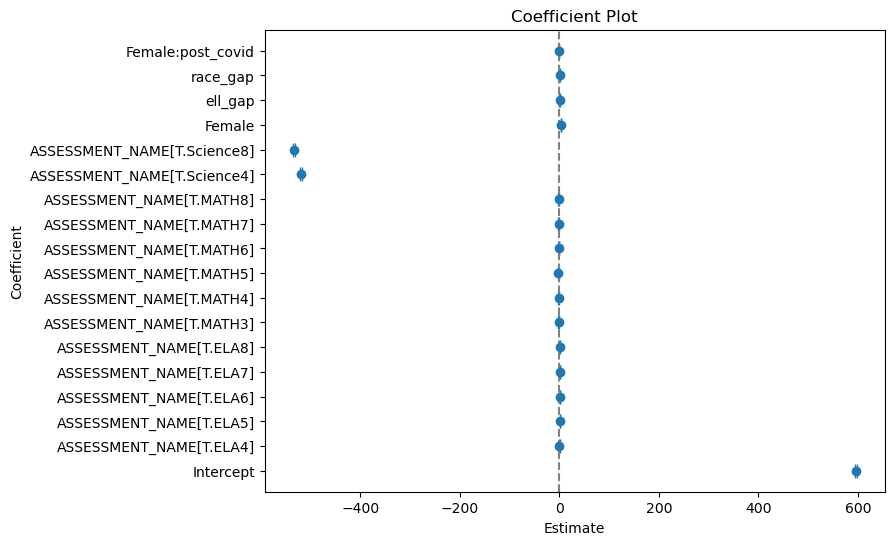

In [35]:
# Extract coefficient data
coefs = results.params
errors = results.std_errors
tvalues = results.tstats

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(coefs, coefs.index, xerr=1.96*errors, fmt='o', capsize=5)
ax.axvline(x=0, color='gray', linestyle='--')
ax.set_ylabel('Coefficient')
ax.set_xlabel('Estimate')
ax.set_title('Coefficient Plot')
plt.show()

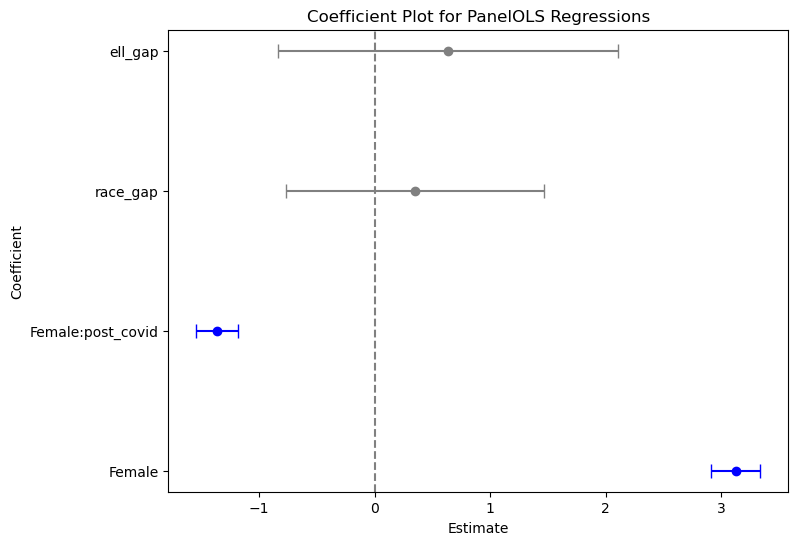

In [36]:
# Extract coefficient data for x1 and x2
coefs = results.params[['Female', 'Female:post_covid', 'race_gap', 'ell_gap']]
errors = results.std_errors[['Female', 'Female:post_covid', 'race_gap', 'ell_gap']]
tvalues = results.tstats[['Female', 'Female:post_covid', 'race_gap', 'ell_gap']]

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
#ax.errorbar(coefs, coefs.index, xerr=1.96*errors, fmt='o', capsize=5)
for i, coef in enumerate(coefs):
    # Check if coefficient is significant
    if abs(coef / errors[i]) > 1.96:
        color = 'blue'  # Change color for significant coefficients
    else:
        color = 'gray'
    ax.errorbar(coef, i, xerr=1.96*errors[i], fmt='o', capsize=5, color=color)
ax.axvline(x=0, color='gray', linestyle='--')
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(coefs.index)
ax.set_ylabel('Coefficient')
ax.set_xlabel('Estimate')
ax.set_title('Coefficient Plot for PanelOLS Regressions')


plt.show()





